### Good Fit (Balanced Signal):
- Both training and validation losses steadily decrease and stay close to each other.
- The model is learning signal and not overfitting.
### Underfitting (Not Enough Signal):
- Both training and validation losses remain high, and there is no gap between them.
- The model is too simple to learn meaningful patterns (signal) from the data.
### Overfitting (Learning Too Much Noise):
- Training loss decreases significantly while the validation loss starts to increase, creating a widening gap.
- The model is memorizing noise and performing poorly on unseen data.

### The Role of Training and Validation Loss:
- Training Loss:
  - The training loss decreases whenever the model learns something new from the training data, whether it’s signal or noise.
  - The model cannot distinguish between signal and noise when minimizing the training loss, so it tries to fit all the patterns in the training data, including the noisy or irrelevant parts.
As a result, the training loss typically keeps going down as the model continues learning, even if it’s learning noise (overfitting).
- Validation Loss:
  - Validation loss decreases only when the model learns useful patterns or signal that can generalize to new, unseen data.
  - If the model starts learning noise from the training data, the validation loss will either plateau or begin to increase. This happens because the noise learned from the training data doesn’t apply to the validation data (since the noise is random and specific to the training set).


#Train a Model with Early Stopping
Let's continue developing the model from the example in the last tutorial. We'll increase the capacity of that network but also add an early-stopping callback to prevent overfitting.

In [112]:
import pandas as pd
from IPython.display import display
red_wine = pd.read_csv('../Stochastic Gradient Descent/Data/winequality-red.csv')

# Create training and validation splits

In [113]:
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


# Scale to [0, 1]

In [114]:
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
display(df_train)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,0.548673,0.239726,0.544304,0.092308,0.237435,0.366197,0.212014,0.619193,0.291262,0.260606,0.369231,0.6
1032,0.309735,0.479452,0.000000,0.246154,0.105719,0.056338,0.028269,0.645088,0.475728,0.121212,0.184615,0.4
1002,0.398230,0.116438,0.417722,0.088462,0.050260,0.169014,0.074205,0.387662,0.378641,0.309091,0.507692,0.8
487,0.495575,0.359589,0.455696,0.069231,0.032929,0.056338,0.028269,0.619193,0.291262,0.054545,0.246154,0.6
979,0.672566,0.226027,0.620253,0.038462,0.071057,0.028169,0.000000,0.520183,0.252427,0.181818,0.307692,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.469027,0.287671,0.569620,0.107692,0.064125,0.211268,0.120141,0.687738,0.504854,0.175758,0.153846,0.4
104,0.230088,0.253425,0.303797,0.100000,0.062392,0.056338,0.106007,0.451637,0.446602,0.090909,0.153846,0.4
815,0.548673,0.226027,0.417722,0.123077,0.112652,0.267606,0.113074,0.617669,0.359223,0.230303,0.369231,0.4
998,0.380531,0.493151,0.430380,0.038462,0.027730,0.042254,0.014134,0.416603,0.242718,0.090909,0.107692,0.6


# Split features and target

In [115]:
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']
display(X_train)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1109,0.548673,0.239726,0.544304,0.092308,0.237435,0.366197,0.212014,0.619193,0.291262,0.260606,0.369231
1032,0.309735,0.479452,0.000000,0.246154,0.105719,0.056338,0.028269,0.645088,0.475728,0.121212,0.184615
1002,0.398230,0.116438,0.417722,0.088462,0.050260,0.169014,0.074205,0.387662,0.378641,0.309091,0.507692
487,0.495575,0.359589,0.455696,0.069231,0.032929,0.056338,0.028269,0.619193,0.291262,0.054545,0.246154
979,0.672566,0.226027,0.620253,0.038462,0.071057,0.028169,0.000000,0.520183,0.252427,0.181818,0.307692
...,...,...,...,...,...,...,...,...,...,...,...
640,0.469027,0.287671,0.569620,0.107692,0.064125,0.211268,0.120141,0.687738,0.504854,0.175758,0.153846
104,0.230088,0.253425,0.303797,0.100000,0.062392,0.056338,0.106007,0.451637,0.446602,0.090909,0.153846
815,0.548673,0.226027,0.417722,0.123077,0.112652,0.267606,0.113074,0.617669,0.359223,0.230303,0.369231
998,0.380531,0.493151,0.430380,0.038462,0.027730,0.042254,0.014134,0.416603,0.242718,0.090909,0.107692


 # minimium amount of change to count as an improvement
 # how many epochs to wait before stopping

In [116]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.01, 
    patience=20, 
    restore_best_weights=True,
)

In [117]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

c:\Users\BS567\Documents\Neural Network\deep learning\deep-learning\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [118]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [119]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], 
    verbose=0,
)

Minimum validation loss: 0.09424157440662384


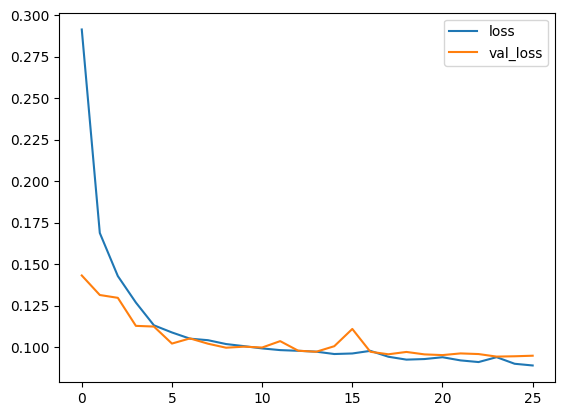

In [120]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))